In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
colleges = pd.read_csv('colleges-sample.csv')

In [3]:
colleges.head()

,College,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,University of Virginia,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95,No
1,University of South Carolina at Columbia,7693,5815,2328,30,66,12594,3661,8074,3522,495,2941,84,88,16.9,18,8246,63,No
2,Univ. of Wisconsin at OshKosh,4800,2900,1515,14,48,7764,1472,6874,2394,518,1890,73,78,19.2,14,5901,56,No
3,University of Nebraska at Lincoln,6277,6003,3526,33,63,16454,3171,5595,3145,500,2070,86,92,15.1,48,6813,53,No
4,University of Pennsylvania,12394,5232,2464,85,100,9205,531,17020,7270,500,1544,95,96,6.3,38,25765,93,Yes


In [4]:
X = (colleges.iloc[:,1:-1]-colleges.iloc[:, 1:-1].mean())/colleges.iloc[:,1:-1].std()

In [5]:
import sklearn.neighbors
adj = sklearn.neighbors.kneighbors_graph(
        X,
        7)

In [6]:
adj = np.array(adj.todense())

In [7]:
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i][j]:
            adj[j][i] = 1

In [8]:
W = adj

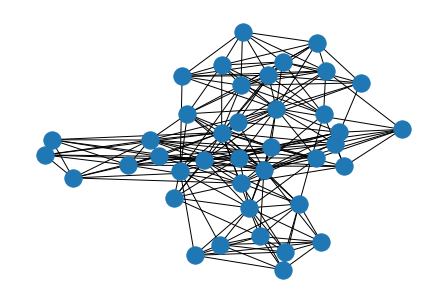

In [9]:
G = nx.Graph(W)
nx.draw(G)

In [10]:
D = np.diag(W.sum(axis=1))

In [11]:
L = D - W

In [12]:
vals, vecs = np.linalg.eigh(L)

In [13]:
vals, vecs

(array([1.63687953e-15, 1.65918671e+00, 2.33081578e+00, 4.25783463e+00,
        5.07593544e+00, 5.93466825e+00, 6.20784052e+00, 6.80332619e+00,
        7.13365262e+00, 7.31409324e+00, 7.71010396e+00, 7.89848922e+00,
        8.00000000e+00, 8.00313766e+00, 8.22520733e+00, 8.44211603e+00,
        8.64997823e+00, 8.81631906e+00, 8.87312955e+00, 8.98962927e+00,
        9.46965945e+00, 9.65262654e+00, 9.84535936e+00, 1.03214747e+01,
        1.07733703e+01, 1.14182361e+01, 1.17283752e+01, 1.18689982e+01,
        1.20467445e+01, 1.21470929e+01, 1.33183561e+01, 1.34498622e+01,
        1.39099912e+01, 1.41609489e+01, 1.42994713e+01, 1.60699659e+01,
        1.74059279e+01, 2.01484236e+01, 2.12798683e+01, 2.23597836e+01]),
 array([[-0.15811388,  0.30333081, -0.10826511, ...,  0.05870024,
         -0.02032898,  0.01569078],
        [-0.15811388, -0.02130243,  0.10209011, ...,  0.0836533 ,
          0.05211856, -0.04777448],
        [-0.15811388, -0.18123975, -0.1749944 , ...,  0.03229716,
        

In [14]:
vecs_sorted = pd.DataFrame(vecs)

In [15]:
colOne = 1
colTwo = 2

In [16]:
f = vecs_sorted.iloc[:,colOne:colTwo + 1]

In [17]:
output = pd.concat([colleges[['College', 'Private']], f], axis=1)

In [18]:
output['Private'] = output['Private'].replace({'No': 'Public', 'Yes': 'Private'})

In [19]:
color_dict = {'Private': 'orange', 'Public': 'blue'}

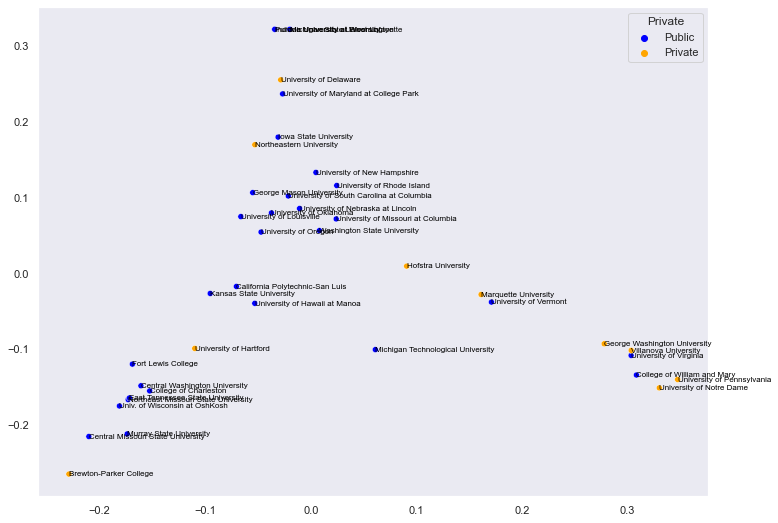

In [20]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.scatterplot(data=output, x=output[colOne], y=output[colTwo], hue='Private', palette=color_dict)

for i in range(output.shape[0]):
    ax.text(output[colOne][i], output[colTwo][i], output['College'][i], horizontalalignment='left', verticalalignment='center', fontsize=8, color='black')
    
ax.grid(False)
ax.set_xlabel(None)
ax.set_ylabel(None);